# Exploring and Preparing Data

- Exploratory Data Analysis
- Preparing Data  Feature Engineering


In [1]:
# importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/content/dataset_part_2.csv')
df.head(11)

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2006-03-24,Falcon 1,20.0,LEO,Kwajalein Atoll,None None,1,False,False,False,NaN,NaN,0,Merlin1A,167.743129,9.047721,0
1,2,2007-03-21,Falcon 1,NaN,LEO,Kwajalein Atoll,None None,1,False,False,False,NaN,NaN,0,Merlin2A,167.743129,9.047721,0
2,4,2008-09-28,Falcon 1,165.0,LEO,Kwajalein Atoll,None None,1,False,False,False,NaN,NaN,0,Merlin2C,167.743129,9.047721,0
3,5,2009-07-13,Falcon 1,200.0,LEO,Kwajalein Atoll,None None,1,False,False,False,NaN,NaN,0,Merlin3C,167.743129,9.047721,0
4,6,2010-06-04,Falcon 9,NaN,LEO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
5,8,2012-05-22,Falcon 9,525.0,LEO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
6,10,2013-03-01,Falcon 9,677.0,ISS,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
7,11,2013-09-29,Falcon 9,500.0,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
8,12,2013-12-03,Falcon 9,3170.0,GTO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0
9,13,2014-01-06,Falcon 9,3325.0,GTO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1005,-80.577366,28.561857,0


First, let's try to see how the `FlightNumber` (indicating the continuous launch attempts.) and `Payload` variables would affect the launch outcome.

We can plot out the <code>FlightNumber</code> vs. <code>PayloadMass</code>and overlay the outcome of the launch. We see that as the flight number increases, the first stage is more likely to land successfully. The payload mass is also important; it seems the more massive the payload, the less likely the first stage will return.

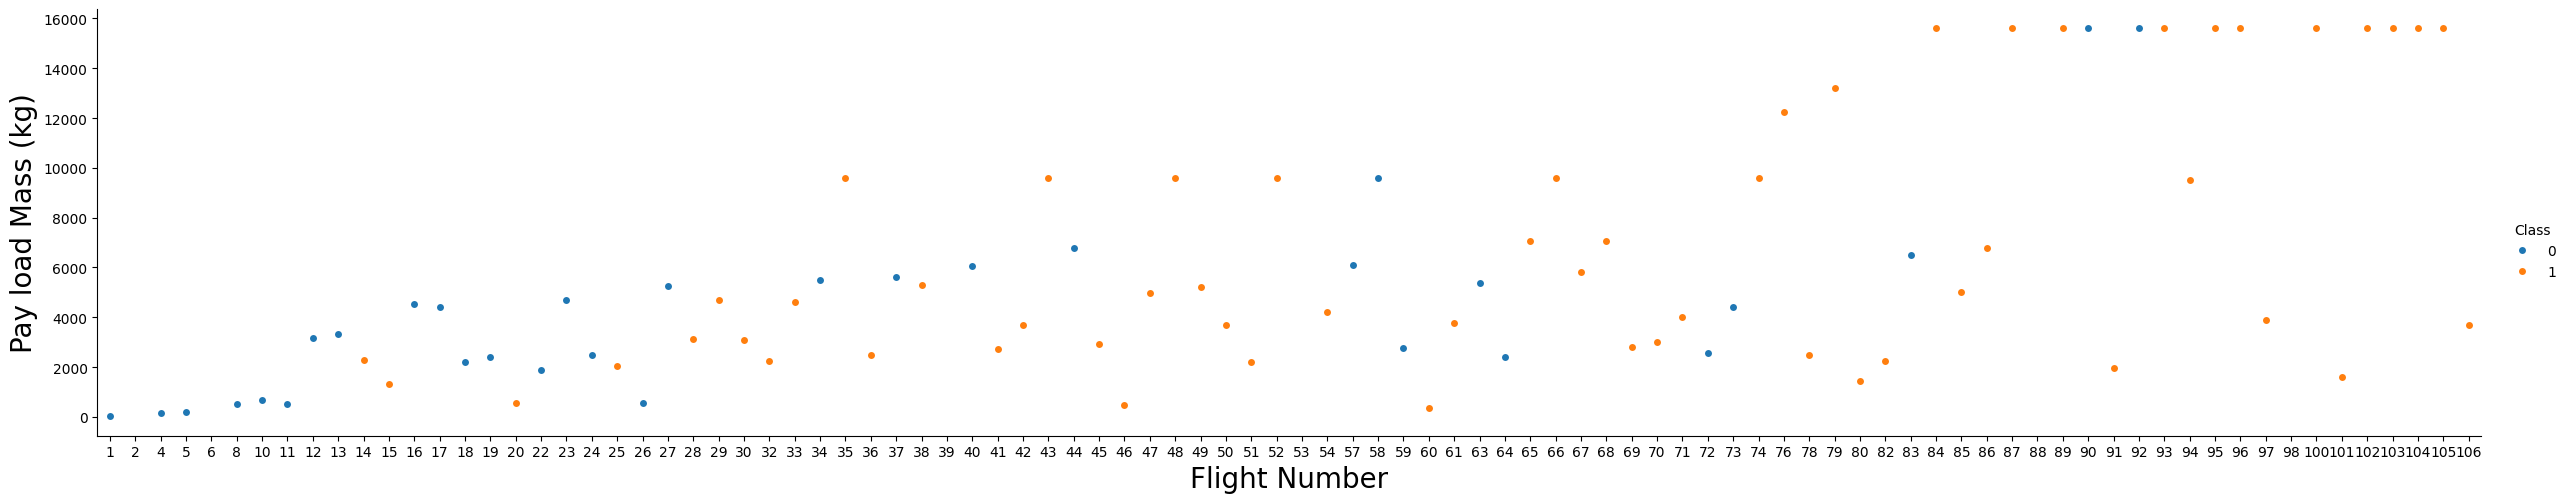

In [3]:
sns.catplot(y="PayloadMass", x="FlightNumber", hue="Class", data=df, aspect = 5)
plt.xlabel("Flight Number",fontsize=20)
plt.ylabel("Pay load Mass (kg)",fontsize=20)
plt.show()

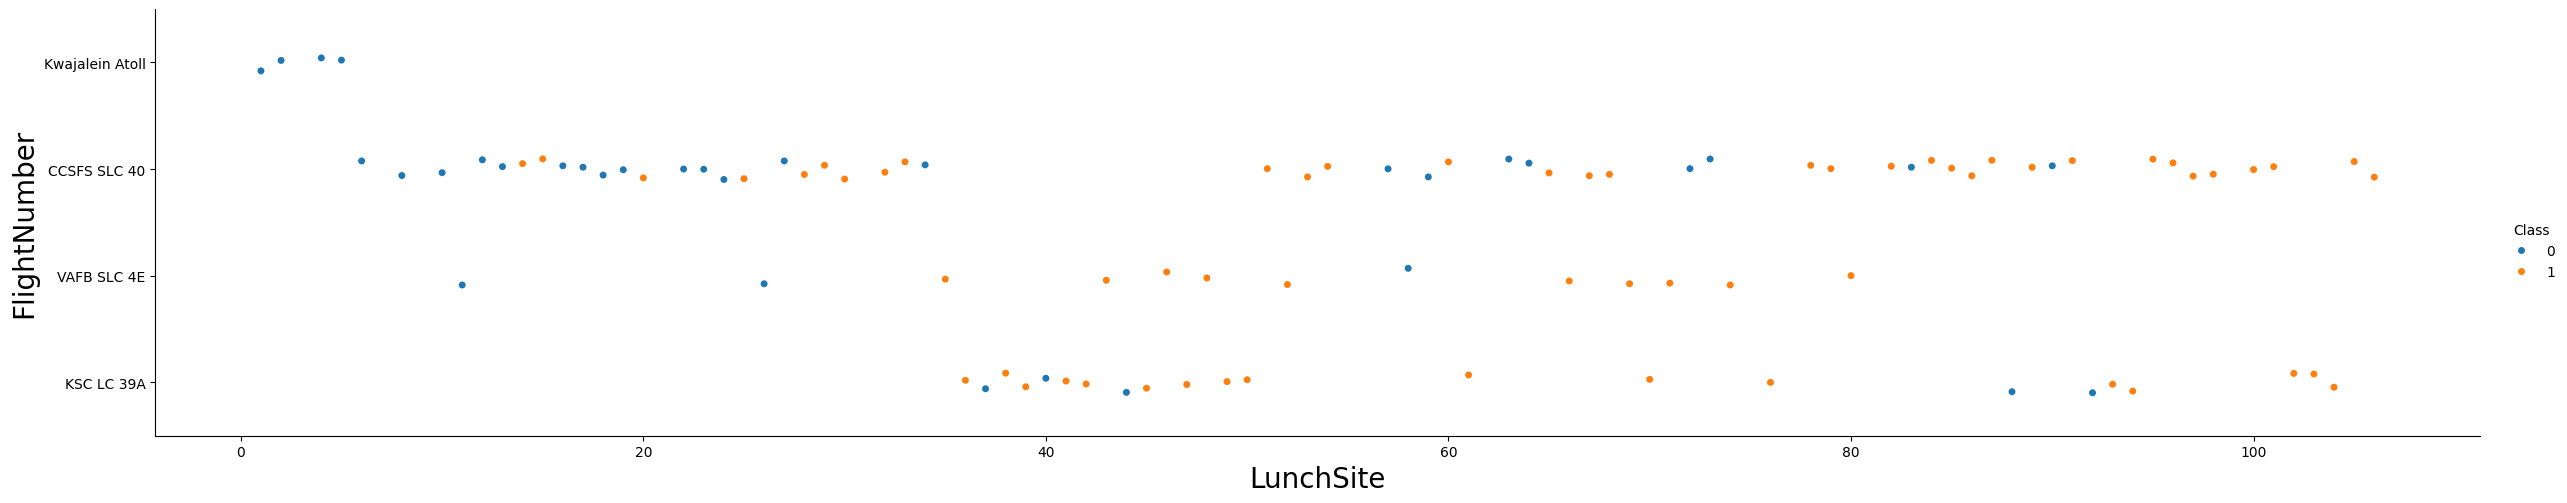

In [17]:
sns.catplot(y="LaunchSite", x="FlightNumber", hue="Class", data=df, aspect = 5)
plt.xlabel("LunchSite",fontsize=20)
plt.ylabel("FlightNumber",fontsize=20)
plt.show()

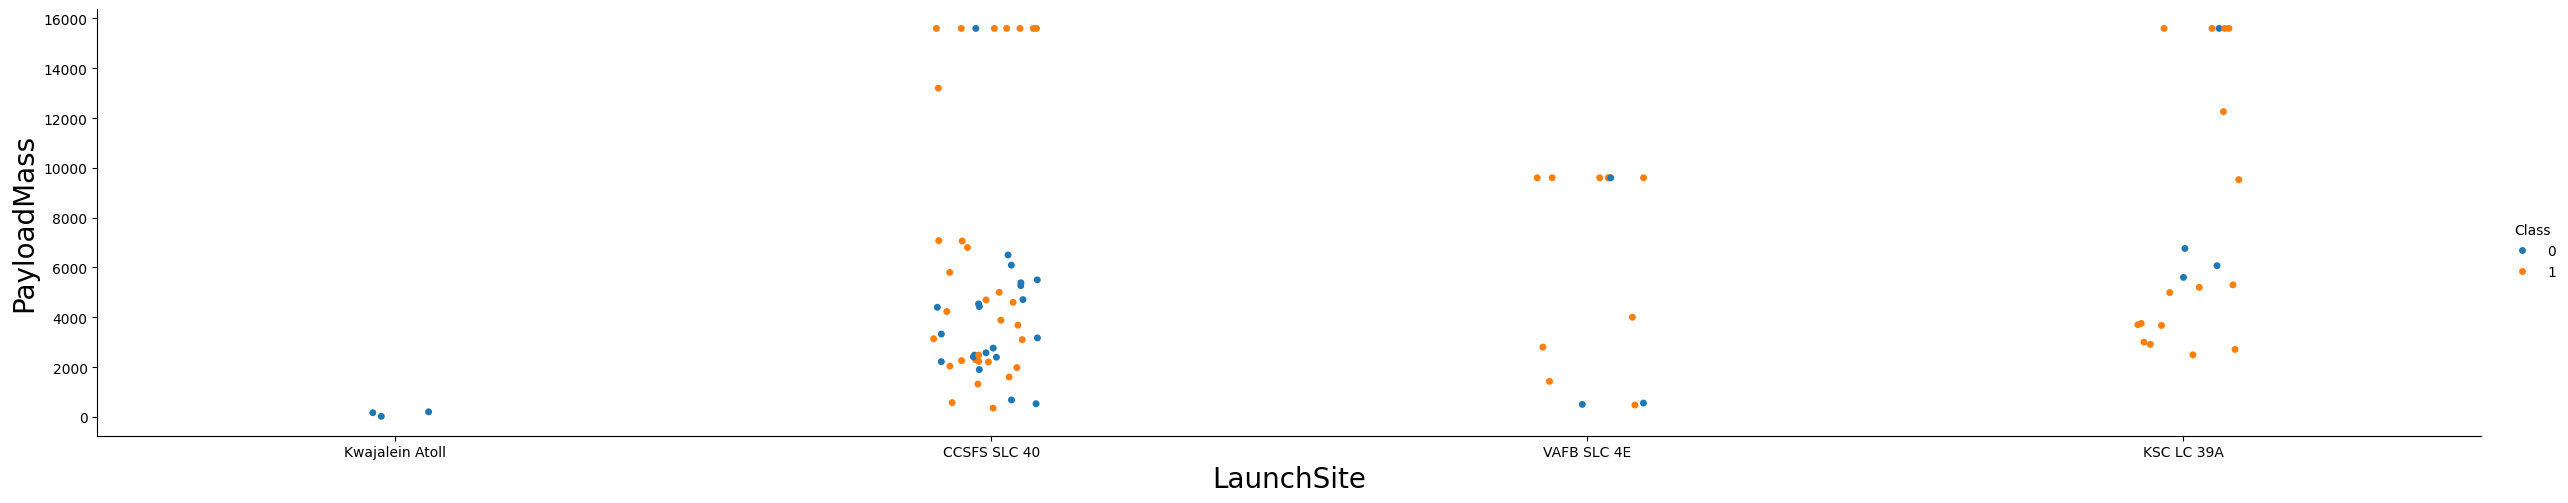

In [18]:
sns.catplot(y="PayloadMass", x="LaunchSite", hue="Class", data=df, aspect = 5)
plt.xlabel("LaunchSite",fontsize=20)
plt.ylabel("PayloadMass",fontsize=20)
plt.show()


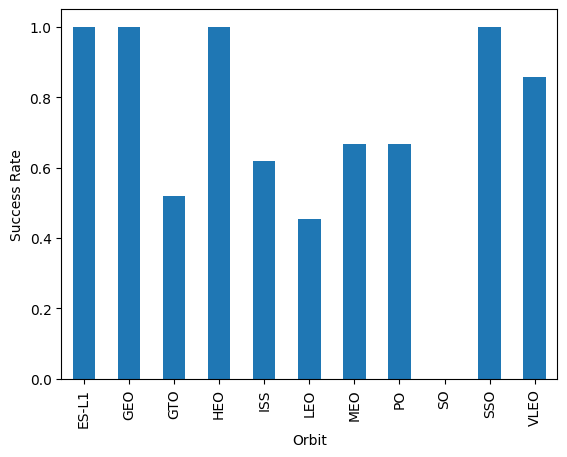

In [27]:

df.groupby('Orbit')['Class'].mean().plot.bar()
plt.xlabel("Orbit")
plt.ylabel("Success Rate")
plt.show()

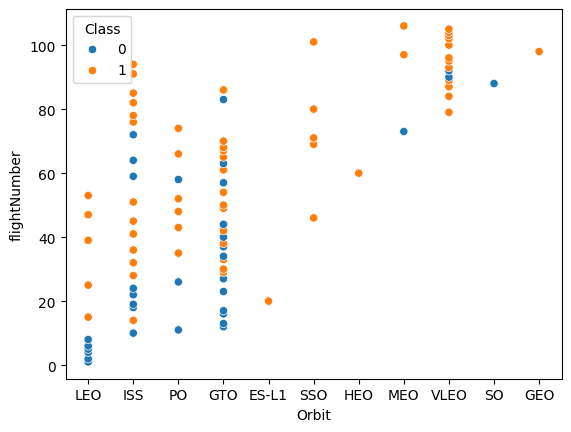

In [30]:
sns.scatterplot(x="Orbit", y="FlightNumber", hue="Class", data=df)
plt.xlabel("Orbit")
plt.ylabel("flightNumber")
plt.show()


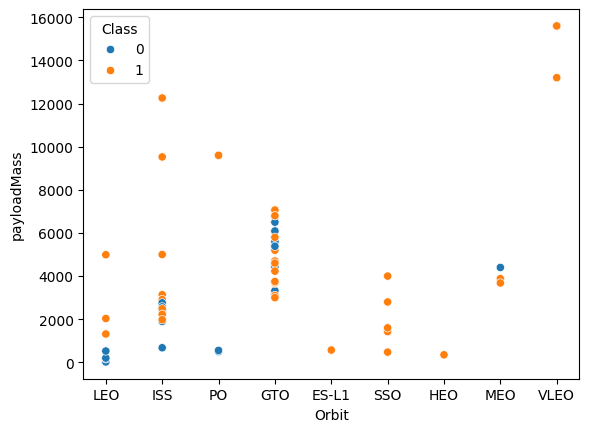

In [31]:
sns.scatterplot(x="Orbit", y="PayloadMass", hue="Class", data=df)
plt.xlabel("Orbit")
plt.ylabel("payloadMass")
plt.show()


In [60]:
# A function to Extract years from the date
year=[]
def Extract_year(date):
    for i in df["Date"]:
        year.append(i.split("-")[0])
    return year

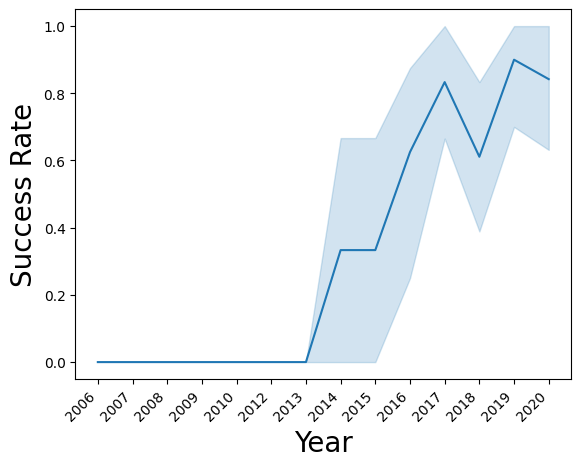

In [61]:
# Plot a line chart with x axis to be the extracted year and y axis to be the success rate
sns.lineplot(x=Extract_year(df["Date"]), y=df["Class"])
plt.xlabel("Year",fontsize=20)
plt.ylabel("Success Rate",fontsize=20)
plt.xticks(rotation=45, ha='right')
plt.show()


# Features Engineering

In [66]:
features = df[['FlightNumber', 'PayloadMass', 'Orbit', 'LaunchSite', 'Flights', 'GridFins', 'Reused', 'Legs', 'LandingPad', 'Block', 'ReusedCount', 'Serial']]
features.head()

,FlightNumber,PayloadMass,Orbit,LaunchSite,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial
0,1,20.0,LEO,Kwajalein Atoll,1,False,False,False,NaN,NaN,0,Merlin1A
1,2,NaN,LEO,Kwajalein Atoll,1,False,False,False,NaN,NaN,0,Merlin2A
2,4,165.0,LEO,Kwajalein Atoll,1,False,False,False,NaN,NaN,0,Merlin2C
3,5,200.0,LEO,Kwajalein Atoll,1,False,False,False,NaN,NaN,0,Merlin3C
4,6,NaN,LEO,CCSFS SLC 40,1,False,False,False,NaN,1.0,0,B0003


Use the function <code>get_dummies</code> and <code>features</code> dataframe to apply OneHotEncoder to the column <code>Orbits</code>, <code>LaunchSite</code>, <code>LandingPad</code>, and <code>Serial</code>. Assign the value to the variable <code>features_one_hot</code>, display the results using the method head. Your result dataframe must include all features including the encoded ones.


In [67]:
# HINT: Use get_dummies() function on the categorical columns
features_one_hot = pd.get_dummies(features, columns=['Orbit', 'LaunchSite', 'LandingPad', 'Serial'])
features_one_hot.head()

,FlightNumber,PayloadMass,Flights,GridFins,Reused,Legs,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,...,Serial_B1054,Serial_B1056,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062,Serial_Merlin1A,Serial_Merlin2A,Serial_Merlin2C,Serial_Merlin3C
0,1,20.0,1,False,False,False,NaN,0,False,False,...,False,False,False,False,False,False,True,False,False,False
1,2,NaN,1,False,False,False,NaN,0,False,False,...,False,False,False,False,False,False,False,True,False,False
2,4,165.0,1,False,False,False,NaN,0,False,False,...,False,False,False,False,False,False,False,False,True,False
3,5,200.0,1,False,False,False,NaN,0,False,False,...,False,False,False,False,False,False,False,False,False,True
4,6,NaN,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False


Now that our <code>features_one_hot</code> dataframe only contains numbers cast the entire dataframe to variable type <code>float64</code>


In [68]:
# HINT: use astype function
features_one_hot = features_one_hot.astype('float64')
features_one_hot.dtypes

FlightNumber       float64
PayloadMass        float64
Flights            float64
GridFins           float64
Reused             float64
                    ...   
Serial_B1062       float64
Serial_Merlin1A    float64
Serial_Merlin2A    float64
Serial_Merlin2C    float64
Serial_Merlin3C    float64
Length: 85, dtype: object

In [69]:
features_one_hot.to_csv('dataset_part_3.csv', index=False)


In [70]:
from google.colab import files
files.download('dataset_part_3.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>